# Regularization

## 1 What is Regularization? 

Regularization is a technique that makes the model less sensitive to training data by introducing a little bias resulting in drop of variance. This is achived by introducing a penalty with error which helps in balancing the weights. This helps the model from not overfitting to training data. 

## 2  How regularization is performed in linear regression? 

In linear regression, regularization is performed when updating the loss function by introducing a penalty that adjusts the magnitude/weight resulting in drop of variance. The penalty is usually multiplied with lamda also know as regularization strength that determines the severity of penalty which can range from 0 to infinity. 

## 3  What is Ridge and Lasso regression? 

Ridge:

Ridge regression is a regularization technique where the penalty is the sum of squres of weights. This form of regularization performs well when most variables/attributes significantly contribute to the model. 

$L_{2} = (\hat{y} - y)^2 + \lambda w^2$

Lasso:

Lasso regression is a regularization technique where the penalty is the absolute value of weights. It performs well when most attributes are useless as it pushes them towards zero. 

$L_{1} = (\hat{y} - y)^2 + \lambda |w|$

The value of regularization strength(lamda) is usually determined by cross validation.

## 4  Ridge and Lasso regression 

In [2]:
#imports
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression, RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error, r2_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
#load data

X, y = load_boston(return_X_y=True)

X = pd.DataFrame(X)

#header for X
header_X = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
X.columns = header_X

y = pd.DataFrame(y)
y.columns = ["MEDV"]

In [4]:
#entire dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

print("size of X_train is: ", X_train.shape)
print("size of X_test is: ", X_test.shape)
print("size of y_train is: ", y_train.shape)
print("size of y_test is: ", y_test.shape)

size of X_train is:  (404, 13)
size of X_test is:  (102, 13)
size of y_train is:  (404, 1)
size of y_test is:  (102, 1)


In [5]:
# min max scaling the variables
scaler =  StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [6]:
#linear regression
lr = LinearRegression() 
lr.fit(X_train_scaled,y_train_scaled)
y_train_pred = lr.predict(X_train_scaled)
print('Mean squared error for training set: %.2f' % mean_squared_error(y_train_scaled, y_train_pred))
print('Coefficient of determination for training set: %.2f' % r2_score(y_train_scaled, y_train_pred))
y_test_pred = lr.predict(X_test_scaled)
print('Mean squared error for testing set: %.2f' % mean_squared_error(y_test_scaled, y_test_pred))
print('Coefficient of determination for testing set: %.2f' % r2_score(y_test_scaled, y_test_pred))

Mean squared error for training set: 0.27
Coefficient of determination for training set: 0.73
Mean squared error for testing set: 0.29
Coefficient of determination for testing set: 0.76


In [7]:
#ridge regression
lamdas = np.logspace(0, 5, 10)
ridge_model = RidgeCV(alphas=lamdas, scoring='r2',alpha_per_target=True).fit(X_train_scaled, y_train_scaled)

print("Ridge Regression R2 for Training set: ",ridge_model.score(X_train_scaled,y_train_scaled))
print("Ridge Regression R2 for Test set: ",ridge_model.score(X_test_scaled,y_test_scaled))
print("Ridge Regression Alpha/Lamda used:", ridge_model.alpha_)

Ridge Regression R2 for Training set:  0.7335407802029916
Ridge Regression R2 for Test set:  0.7537618648108115
Ridge Regression Alpha/Lamda used: 3.5938136638046276


In [8]:
#lasso regression
lamdas = np.logspace(0, 5, 10)
lasso_model = LassoCV(cv=5, random_state=0).fit(X_train_scaled, y_train_scaled)

print("Lasso Regression R2 for Training set: ",lasso_model.score(X_train_scaled,y_train_scaled))
print("Lasso Regression R2 for Test set: ",lasso_model.score(X_test_scaled,y_test_scaled))
print("Lasso Regression Alpha/Lamda used:", lasso_model.alpha_)

Lasso Regression R2 for Training set:  0.7332071019782631
Lasso Regression R2 for Test set:  0.7536819609085864
Lasso Regression Alpha/Lamda used: 0.003418736104623203


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## 5  Ridge and Lasso regression on HCC.csv dataset after performing necessary pre-processing 

In [9]:
#load dataset
hcc_data = pd.read_csv('./HCC.csv')
hcc_data.columns

Index(['Unnamed: 0', '1.Gen', '2.Sym', '3.Alc', '4.HepB', '6.HepB', '7.HepC',
       '8.Cir', '11.Dia', '12.Obe', '13.Hem', '14.Art', '15.CRen', '16.HIV',
       '17.Non', '19.Spl', '20.PHyp', '21.Thr', '22.LMet', '23.Rad',
       '24.Agedia', '27.Sta', '28.Encdeg', '29.Ascdeg', ' 30.IntNorRat',
       ' 31.Alp', ' 32.Hae', ' 33.MCorVol', ' 34.Leu', '35.Plat', '36.Alb',
       '37.Bil', '38.Ala', '39.Aspa', '40.Gam', '41.Alk', '42.Prot', '43.Crea',
       '44.NNod', '45.dnod', 'Class'],
      dtype='object')

In [10]:
# rename cols
for col in hcc_data.columns:
    tmp_col = ''.join(i for i in col if not(i.isdigit() or i=='.' or i ==" "))
    hcc_data.rename(columns = {col: tmp_col}, inplace=True)
hcc_data.rename(columns = {'Unnamed:': 'Index'}, inplace=True)
hcc_data.columns


Index(['Index', 'Gen', 'Sym', 'Alc', 'HepB', 'HepB', 'HepC', 'Cir', 'Dia',
       'Obe', 'Hem', 'Art', 'CRen', 'HIV', 'Non', 'Spl', 'PHyp', 'Thr', 'LMet',
       'Rad', 'Agedia', 'Sta', 'Encdeg', 'Ascdeg', 'IntNorRat', 'Alp', 'Hae',
       'MCorVol', 'Leu', 'Plat', 'Alb', 'Bil', 'Ala', 'Aspa', 'Gam', 'Alk',
       'Prot', 'Crea', 'NNod', 'dnod', 'Class'],
      dtype='object')

### Preprocessing

In [11]:
# check for na
hcc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      156 non-null    int64  
 1   Gen        156 non-null    int64  
 2   Sym        156 non-null    float64
 3   Alc        156 non-null    int64  
 4   HepB       156 non-null    float64
 5   HepB       156 non-null    float64
 6   HepC       156 non-null    float64
 7   Cir        156 non-null    int64  
 8   Dia        156 non-null    float64
 9   Obe        156 non-null    float64
 10  Hem        156 non-null    float64
 11  Art        156 non-null    float64
 12  CRen       156 non-null    float64
 13  HIV        156 non-null    float64
 14  Non        156 non-null    float64
 15  Spl        156 non-null    float64
 16  PHyp       156 non-null    float64
 17  Thr        156 non-null    float64
 18  LMet       156 non-null    float64
 19  Rad        156 non-null    float64
 20  Agedia    

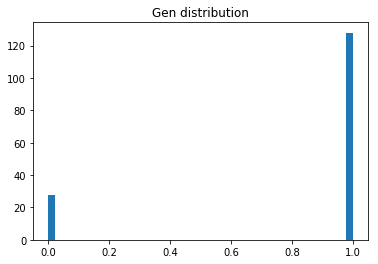

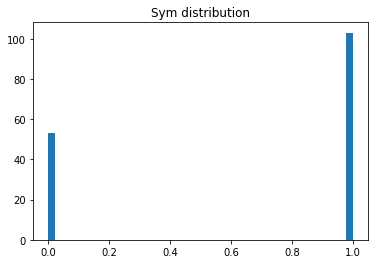

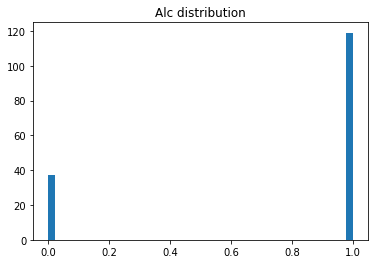

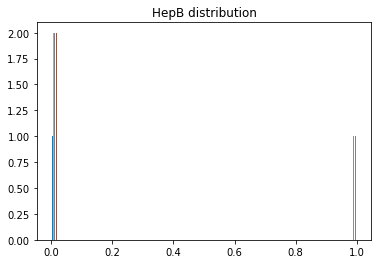

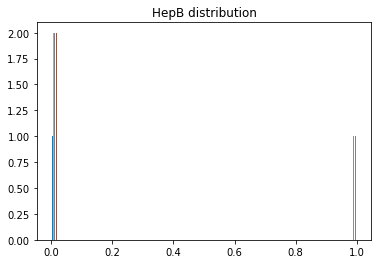

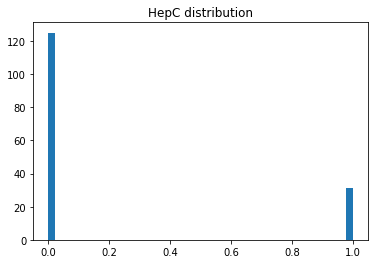

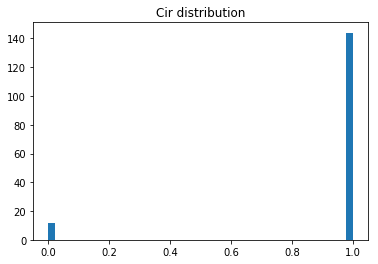

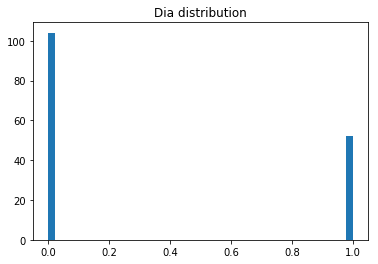

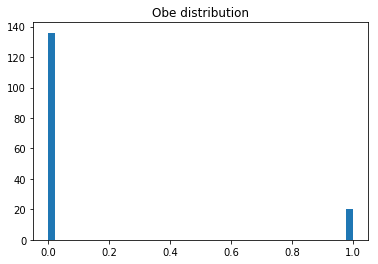

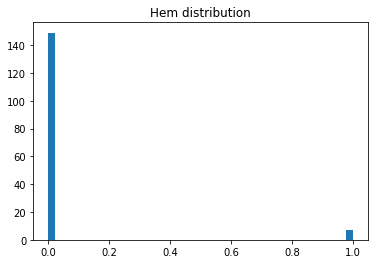

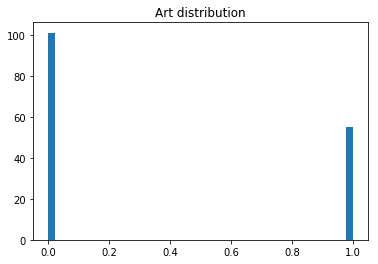

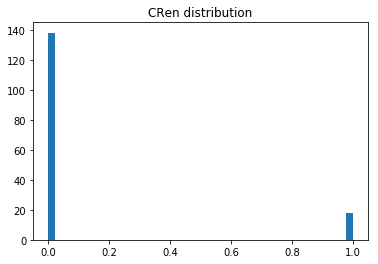

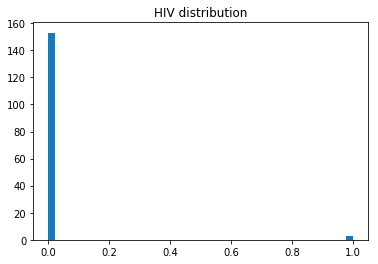

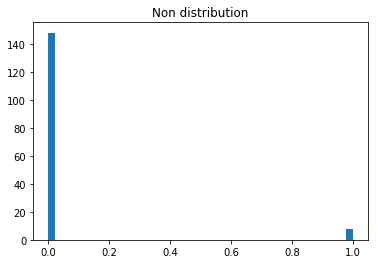

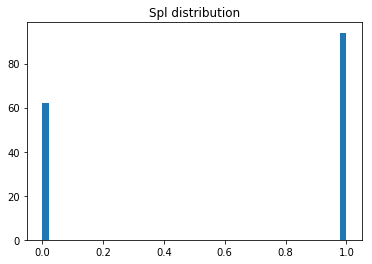

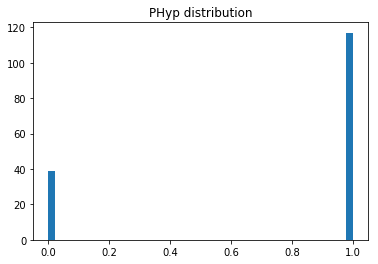

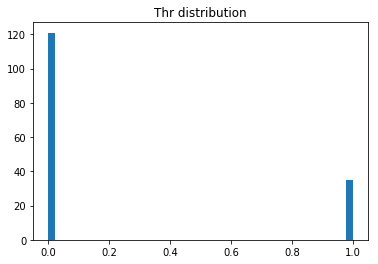

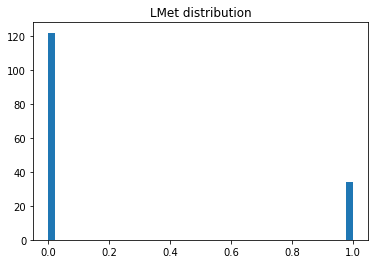

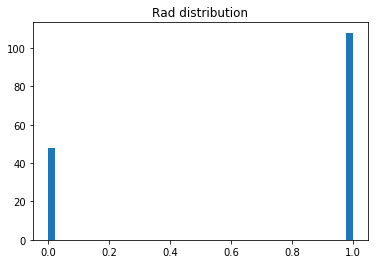

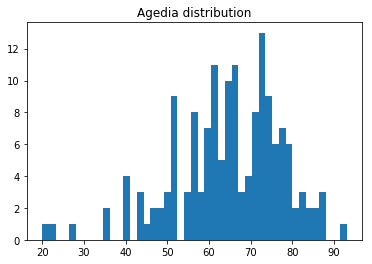

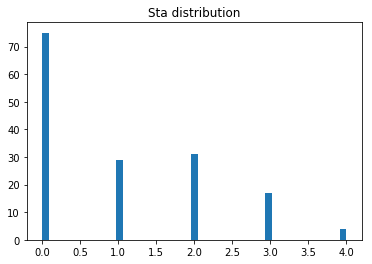

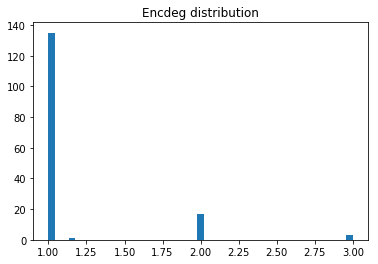

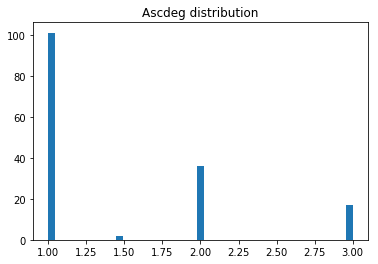

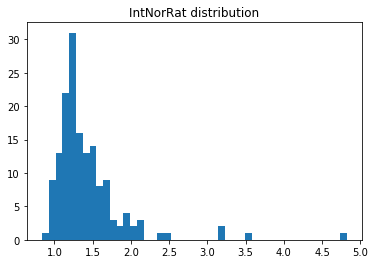

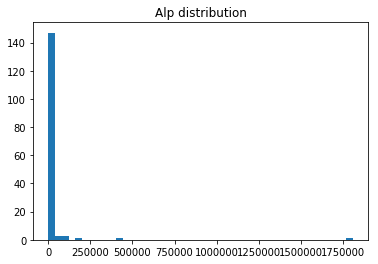

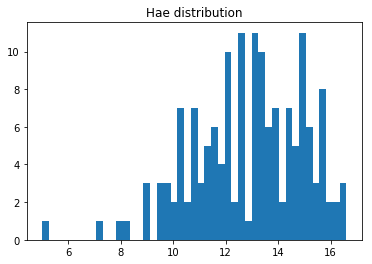

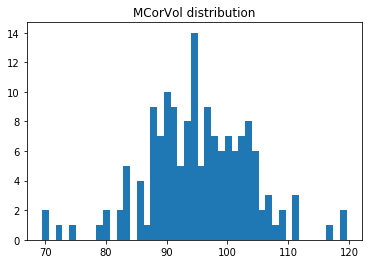

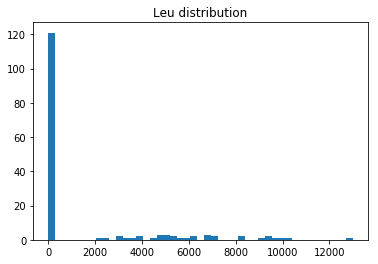

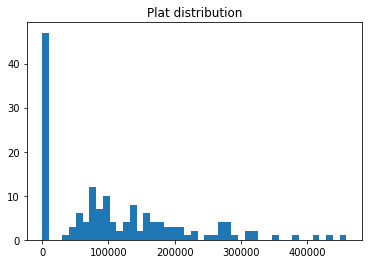

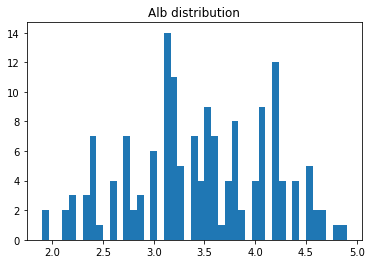

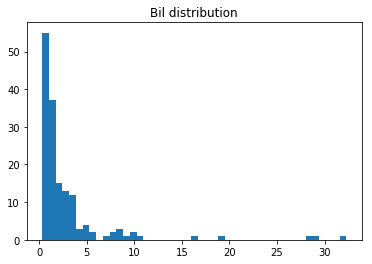

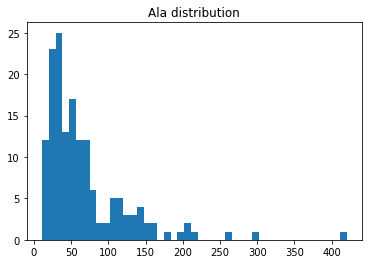

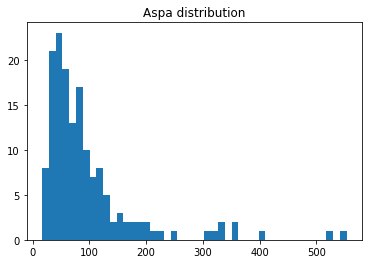

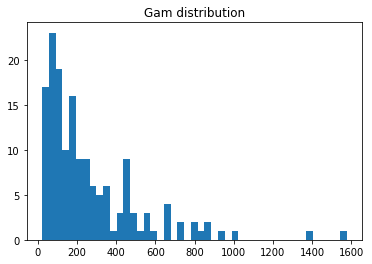

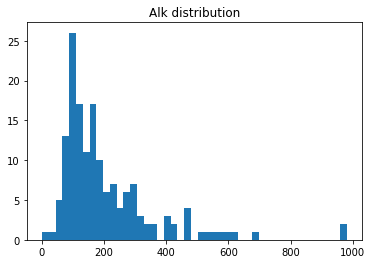

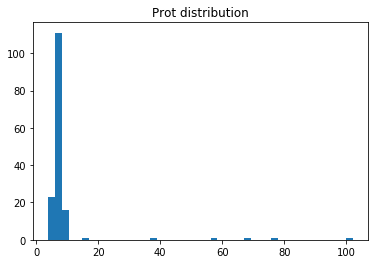

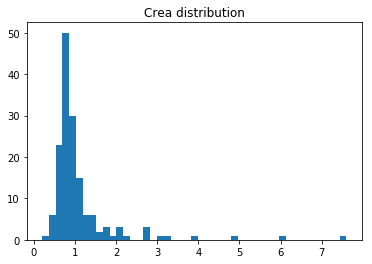

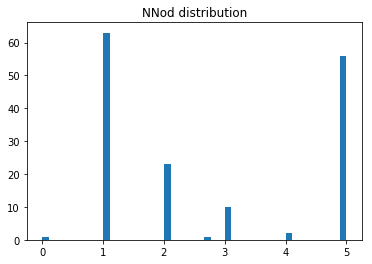

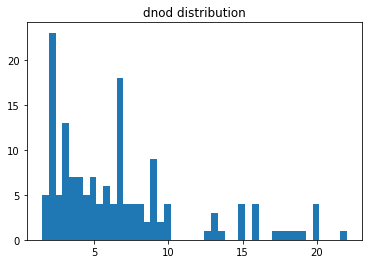

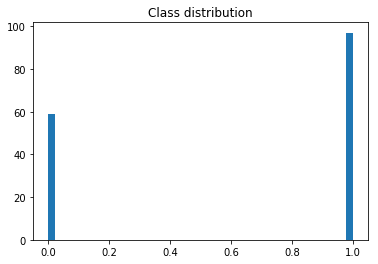

In [12]:
#data distribution
# data bistibution histogram 
for col in hcc_data.columns:
    if(col != "Index"):
        plt.title(col +" distribution")
        plt.hist(hcc_data[col], bins=45)
        plt.show()

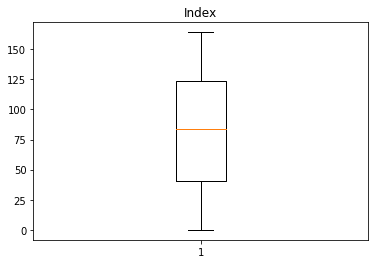

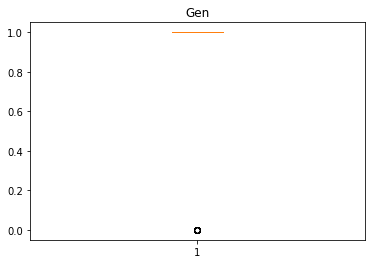

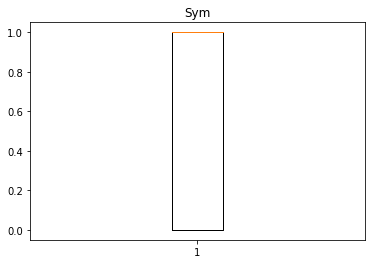

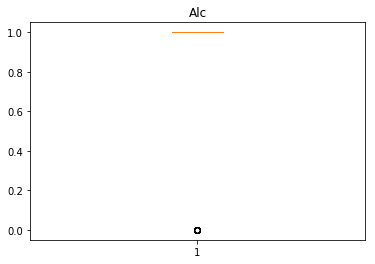

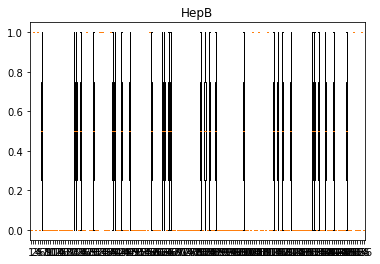

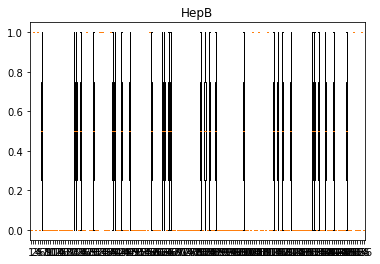

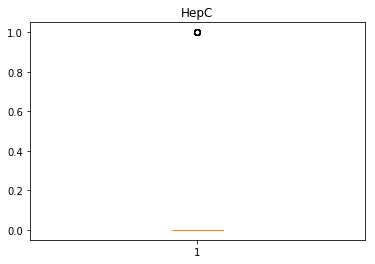

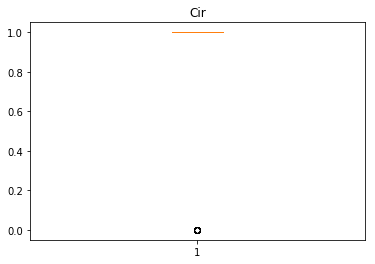

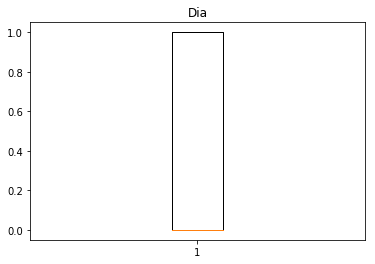

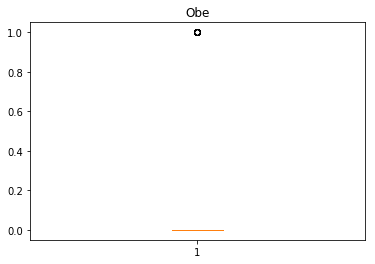

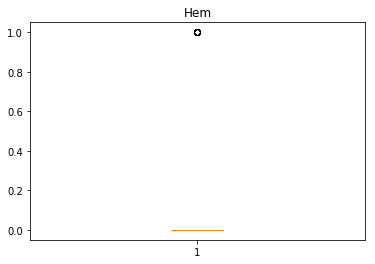

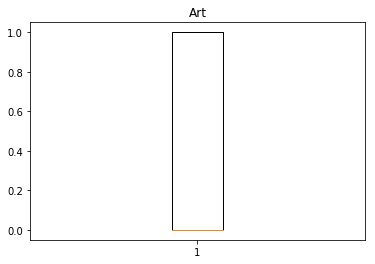

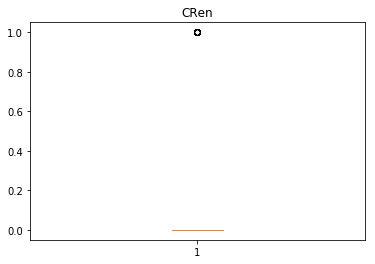

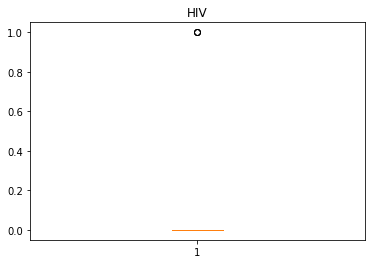

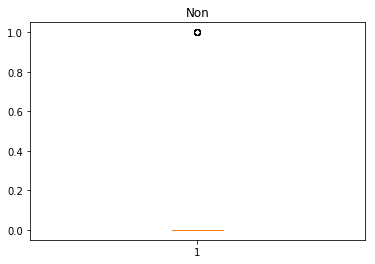

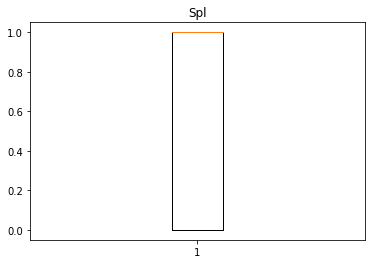

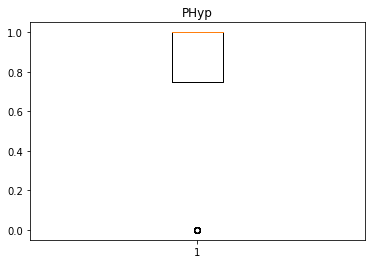

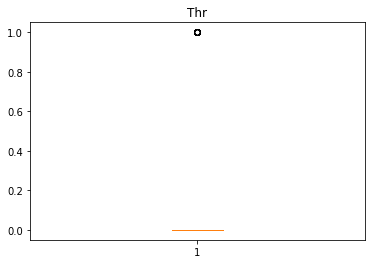

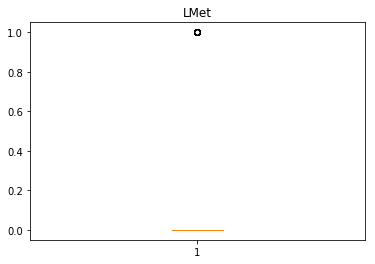

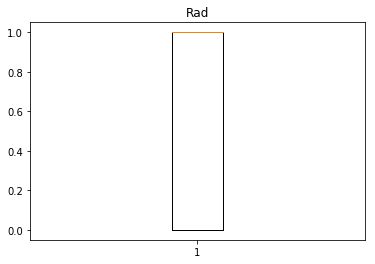

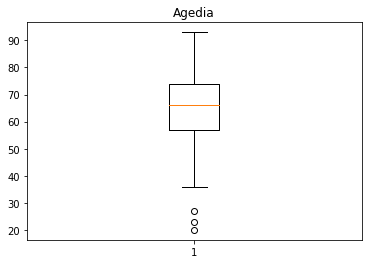

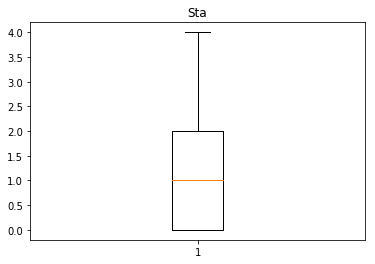

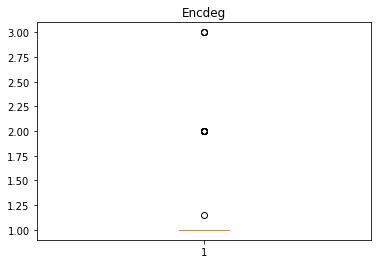

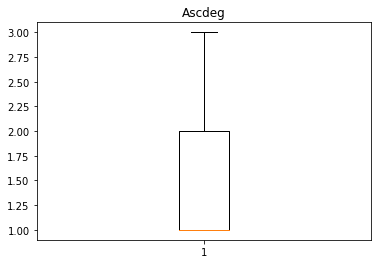

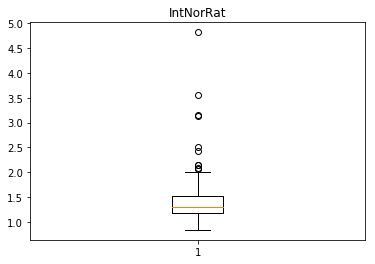

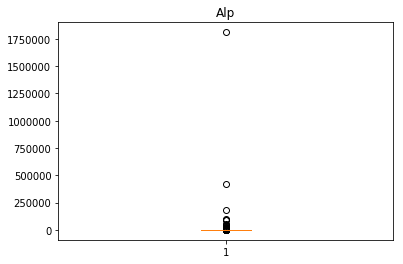

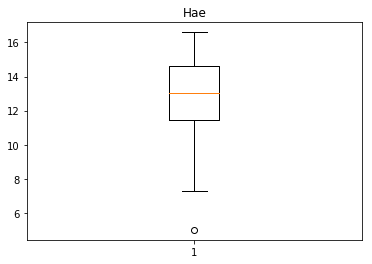

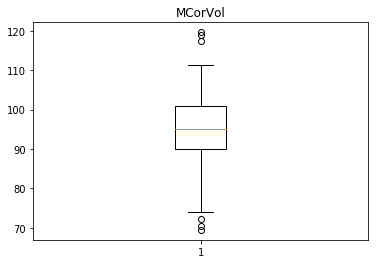

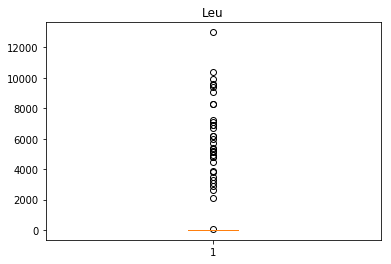

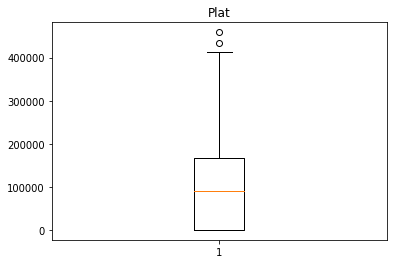

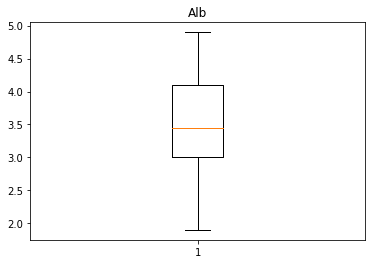

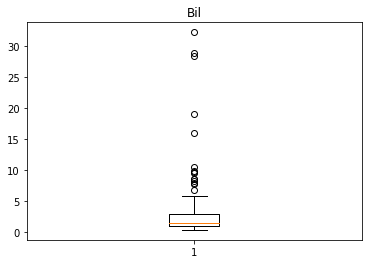

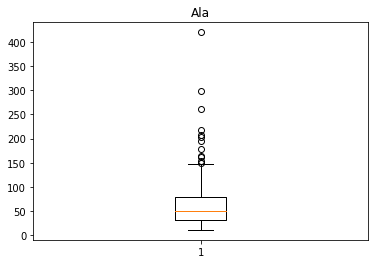

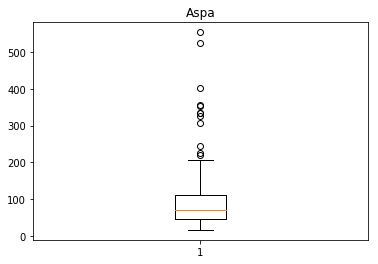

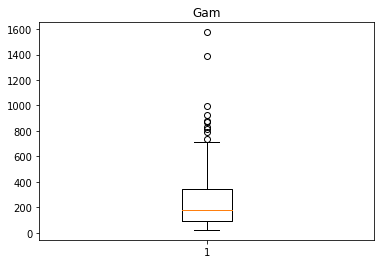

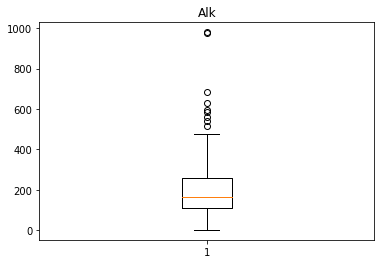

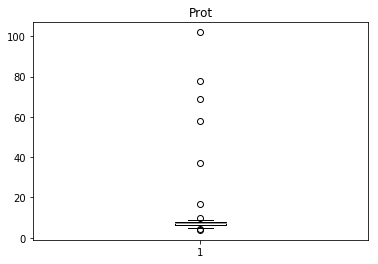

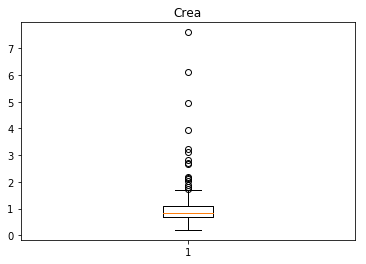

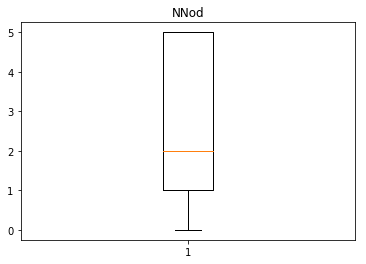

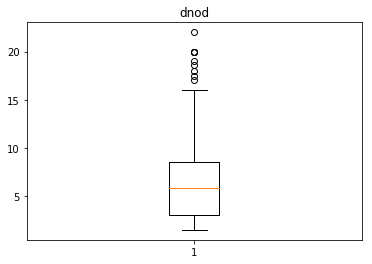

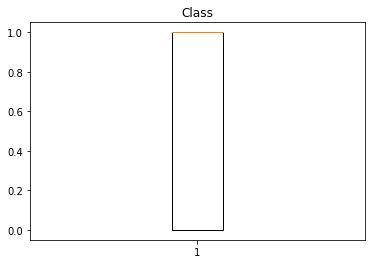

In [13]:
# outliers
for col in hcc_data.columns:
    fig, ax = plt.subplots()
    ax.boxplot(hcc_data[col])
    ax.set_title(col)
    plt.show()

Attributes IntNorRat,Leu,Bil,Ala,Aspa,Prot,Crea seem to have many outliers

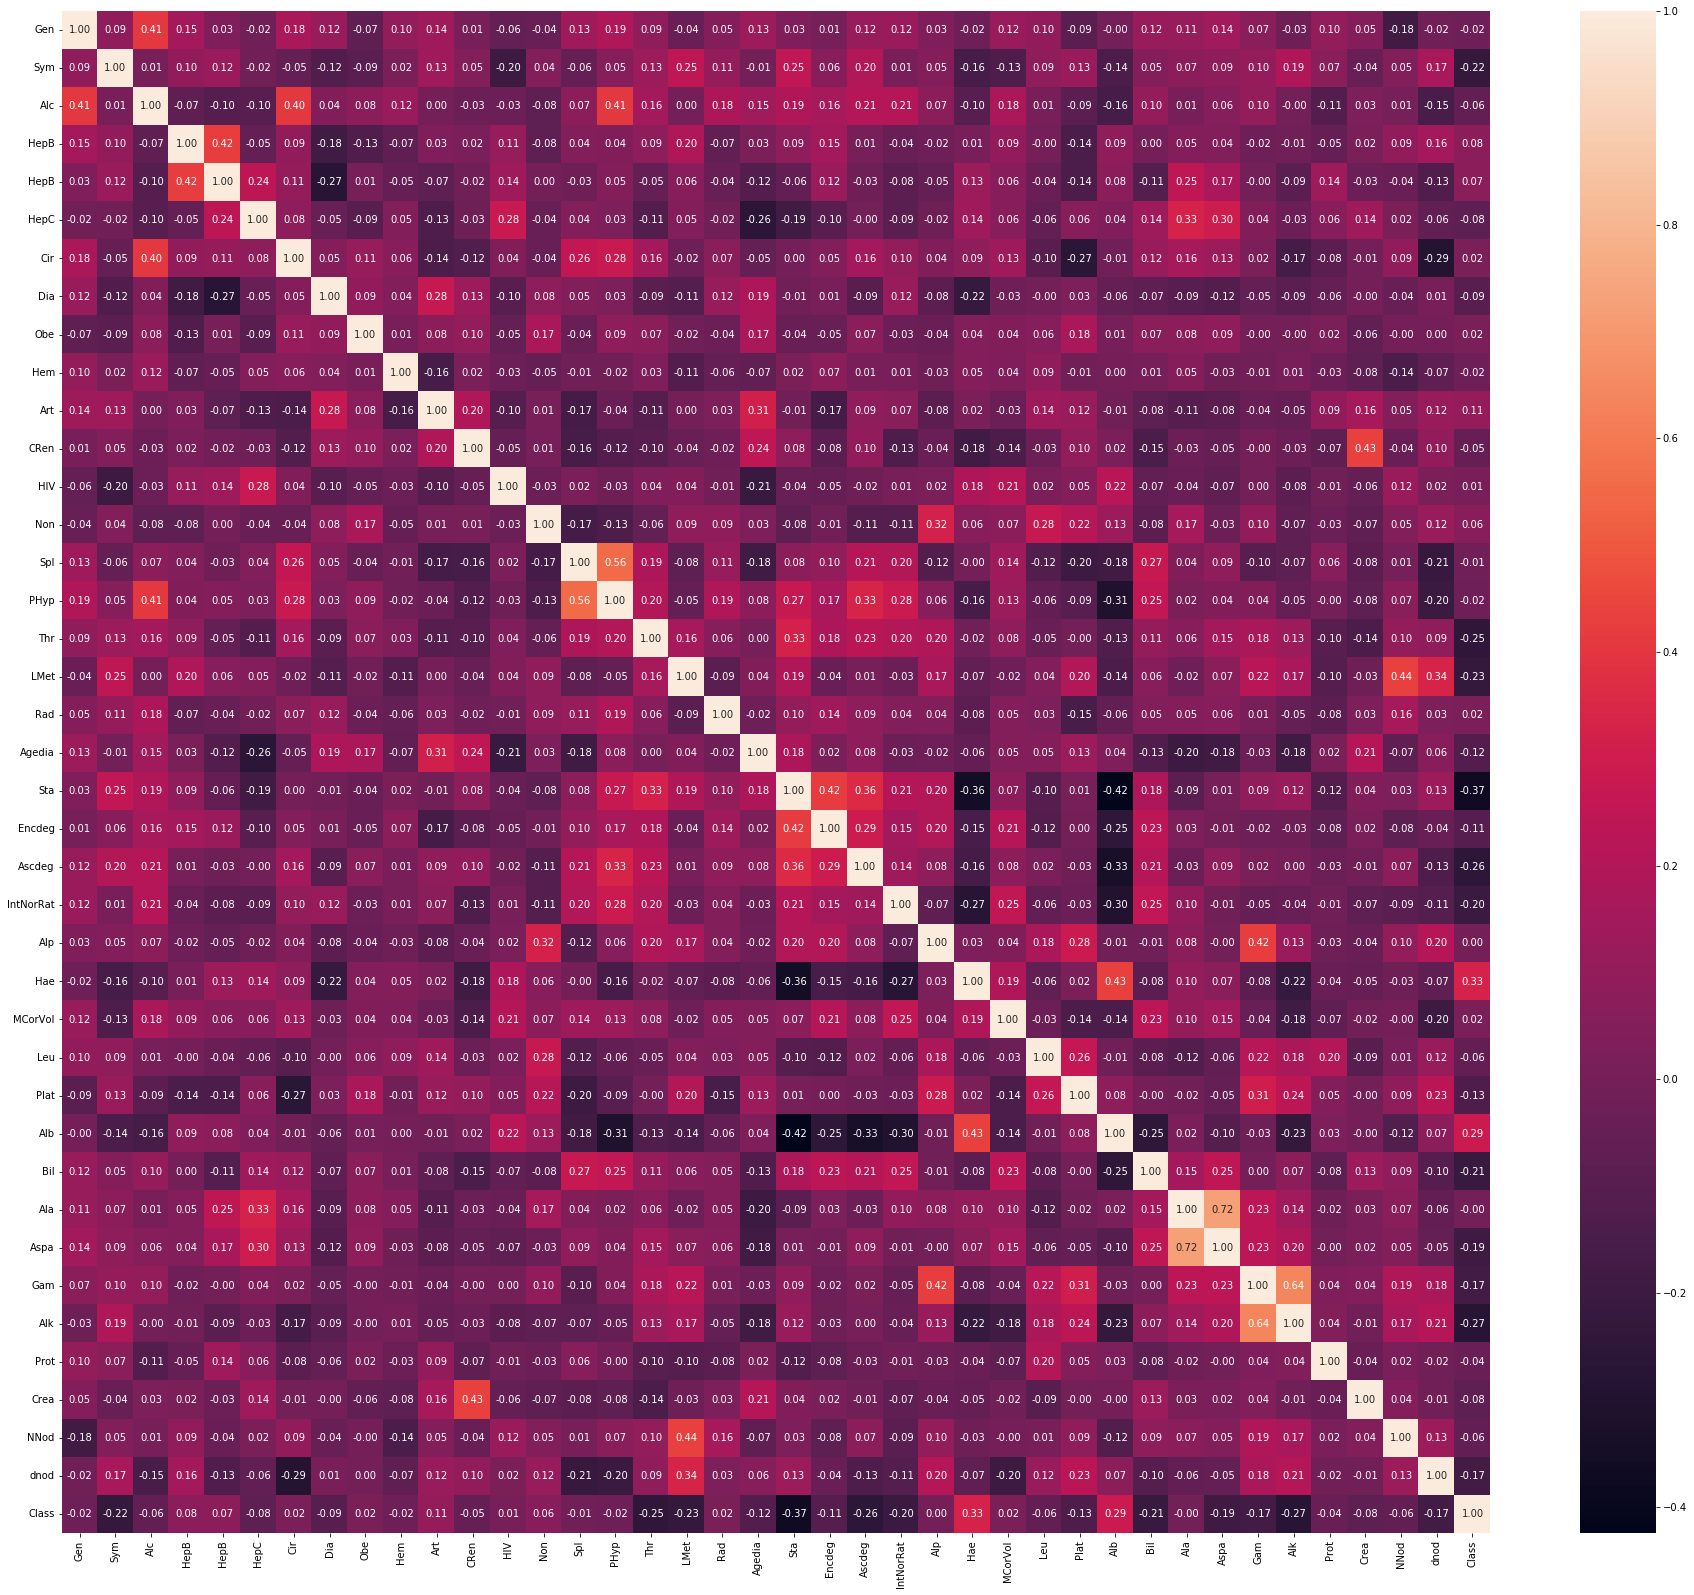

In [28]:
#pearson correlation
data = hcc_data.iloc[:,1:]
pearson_corr = data.corr()
plt.figure(figsize = (32, 28))
sns.heatmap(pearson_corr, annot = True, fmt = '.2f')

From the above correlation matrix it can be observed that:
   - Attributes Ala and Aspa are highly correlated and the correlation of Aspa with target variable is higher than that of Ala, Thus we can drop Ala
   - Attributes Gam and Alk are highly correlated and the correlation of Alk with target variable is higher than that of Gam, Thus we can drop Gam
   - Attributes Leu,Prot,Crea have many outliers and have very little correlation with target variable thus, lets drop those attributes as well.
   - selcted attributes with absolute correlation atleast greater than 0.25 - Thr,Sta,Ascdeg,Hae,Alb,Alk

In [15]:
def sigmoid(x, threshold):
    tmp = x.copy()
    for val in tmp:
        curr = 1 / (1 + math.exp(-val[0]))
        if(curr >= threshold):
            val[0] = 1
        else:
            val[0] = 0
    return tmp

In [16]:
def sigmoid_lasso(x,threshold):
    tmp = x.copy()
    for i,val in enumerate(x):
        curr = 1 / (1 + math.exp(-val))
        if(curr >= threshold):
            tmp[i] = 1
        else:
            tmp[i] = 0
    return tmp

In [25]:
#entire dataset
X_hcc = hcc_data.iloc[:,1:-1]
y_hcc = hcc_data.iloc[:,-1:]
print(X_hcc.columns)
print(y_hcc.columns)
X_train_hcc, X_test_hcc, y_train_hcc, y_test_hcc = train_test_split(X_hcc, y_hcc, test_size = 0.2, random_state = 100)

X_train_hcc = X_train_hcc.reset_index(drop = True)
X_test_hcc = X_test_hcc.reset_index(drop = True)
y_train_hcc = y_train_hcc.reset_index(drop = True)
y_test_hcc = y_test_hcc.reset_index(drop = True)

print("size of X_train is: ", X_train_hcc.shape)
print("size of X_test is: ", X_test_hcc.shape)
print("size of y_train is: ", y_train_hcc.shape)
print("size of y_test is: ", y_test_hcc.shape)

Index(['Gen', 'Sym', 'Alc', 'HepB', 'HepB', 'HepC', 'Cir', 'Dia', 'Obe', 'Hem',
       'Art', 'CRen', 'HIV', 'Non', 'Spl', 'PHyp', 'Thr', 'LMet', 'Rad',
       'Agedia', 'Sta', 'Encdeg', 'Ascdeg', 'IntNorRat', 'Alp', 'Hae',
       'MCorVol', 'Leu', 'Plat', 'Alb', 'Bil', 'Ala', 'Aspa', 'Gam', 'Alk',
       'Prot', 'Crea', 'NNod', 'dnod'],
      dtype='object')
Index(['Class'], dtype='object')
size of X_train is:  (124, 39)
size of X_test is:  (32, 39)
size of y_train is:  (124, 1)
size of y_test is:  (32, 1)


In [26]:
# min max scaling the variables
scaler =  StandardScaler()
scaler.fit(X_hcc)
X_train_hcc = scaler.transform(X_train_hcc)
X_test_hcc = scaler.transform(X_test_hcc)


In [23]:
lr_hcc = LinearRegression() 
lr_hcc.fit(X_train_hcc,y_train_hcc)

prob = [0.15,0.25,0.35,0.45,0.50,0.55,0.65,0.75,0.85,0.95]


#train
y_train_pred_hcc_lr = lr_hcc.predict(X_train_hcc)
for p in prob:
    print("Linear Regression with Sigmoid - Train, Threshold = ",p)
    y_train_pred_hcc_lr = sigmoid(y_train_pred_hcc_lr, p)
    print(classification_report(y_train_hcc, y_train_pred_hcc_lr))

#test
y_test_pred_hcc_lr = lr_hcc.predict(X_test_hcc)
for p in prob:
    print("Linear Regression with Sigmoid - Test, Threshold = ",p)
    y_test_pred_hcc_lr = sigmoid(y_test_pred_hcc_lr,p)
    print(classification_report(y_test_hcc, y_test_pred_hcc_lr))

Linear Regression with Sigmoid - Train, Threshold =  0.15
[[-2.50869755]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.50869755]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.50869755]
 [-2.50869755]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.50869755]
 [-2.50869755]
 [-2.50869755]
 [-2.50869755]
 [-2.39779648]
 [-2.50869755]
 [-2.50869755]
 [-2.50869755]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.50869755]
 [-2.39779648]
 [-2.50869755]
 [-2.39779648]
 [-2.39779648]
 [-2.50869755]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.50869755]
 [-2.50869755]
 [-2.39779648]
 [-2.39779648]
 [-2.50869755]
 [-2.50869755]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.50869755]
 [-2.50869755]
 [-2.50869755]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.50869755]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.39779648]
 [-2.50869755]
 [-2.39779648]
 [-2.39779648]
 [-2.5086975

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [254]:
#ridge regression
lamdas = np.logspace(0, 5, 10)
ridge_model_hcc = RidgeCV(alphas=lamdas, scoring='r2',alpha_per_target=True).fit(X_train_hcc, y_train_hcc)

prob = [0.15,0.25,0.35,0.45,0.50,0.55,0.65,0.75,0.85,0.95]

y_train_pred_hcc_rr = ridge_model_hcc.predict(X_train_hcc)

for p in prob:
    print("Ridge Regression with Sigmoid - Train, Threshold = ",p)
    y_train_pred_hcc_rr = sigmoid(y_train_pred_hcc_rr,p)
    print(classification_report(y_train_hcc, y_train_pred_hcc_rr))


#test
y_test_pred_hcc_rr = ridge_model_hcc.predict(X_test_hcc)
for p in prob:
    print("Ridge Regression with Sigmoid - Test, Threshold = ",p)
    y_test_pred_hcc_rr = sigmoid(y_test_pred_hcc_rr,p)
    print(classification_report(y_test_hcc, y_test_pred_hcc_rr))



Ridge Regression with Sigmoid - Train, Threshold =  0.15
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accuracy                           0.62       124
   macro avg       0.31      0.50      0.38       124
weighted avg       0.39      0.62      0.48       124

Ridge Regression with Sigmoid - Train, Threshold =  0.25
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accuracy                           0.62       124
   macro avg       0.31      0.50      0.38       124
weighted avg       0.39      0.62      0.48       124

Ridge Regression with Sigmoid - Train, Threshold =  0.35
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accurac

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accuracy                           0.62       124
   macro avg       0.31      0.50      0.38       124
weighted avg       0.39      0.62      0.48       124

Ridge Regression with Sigmoid - Train, Threshold =  0.75
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        47
           1       0.00      0.00      0.00        77

    accuracy                           0.38       124
   macro avg       0.19      0.50      0.27       124
weighted avg       0.14      0.38      0.21       124

Ridge Regression with Sigmoid - Train, Threshold =  0.85
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        47
           1       0.00      0.00      0.00        77

    accuracy                           0.38       124
   macro avg  

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      1.00      0.77        20

    accuracy                           0.62        32
   macro avg       0.31      0.50      0.38        32
weighted avg       0.39      0.62      0.48        32

Ridge Regression with Sigmoid - Test, Threshold =  0.25
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      1.00      0.77        20

    accuracy                           0.62        32
   macro avg       0.31      0.50      0.38        32
weighted avg       0.39      0.62      0.48        32

Ridge Regression with Sigmoid - Test, Threshold =  0.35
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      1.00      0.77        20

    accuracy                           0.62        32
   macro avg    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [255]:
#lasso regression
lamdas = np.logspace(0, 5, 10)
lasso_model_hcc = LassoCV(cv=5, random_state=0).fit(X_train_hcc, y_train_hcc)

prob = [0.15,0.25,0.35,0.45,0.50,0.55,0.65,0.75,0.85,0.95]

y_train_pred_hcc_la = lasso_model_hcc.predict(X_train_hcc)
for p in prob:
    print("Lasso Regression with Sigmoid - Train, Threshold = ",p)
    y_train_pred_hcc_la = sigmoid_lasso(y_train_pred_hcc_la,p)
    print(classification_report(y_train_hcc, y_train_pred_hcc_la))


#test
y_test_pred_hcc_la = lasso_model_hcc.predict(X_test_hcc)
for p in prob:
    print("Lasso Regression with Sigmoid - Test, Threshold = ",p)
    y_test_pred_hcc_la = sigmoid_lasso(y_test_pred_hcc_la,p)
    print(classification_report(y_test_hcc, y_test_pred_hcc_la))







/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Lasso Regression with Sigmoid - Train, Threshold =  0.15
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accuracy                           0.62       124
   macro avg       0.31      0.50      0.38       124
weighted avg       0.39      0.62      0.48       124

Lasso Regression with Sigmoid - Train, Threshold =  0.25


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accuracy                           0.62       124
   macro avg       0.31      0.50      0.38       124
weighted avg       0.39      0.62      0.48       124

Lasso Regression with Sigmoid - Train, Threshold =  0.35
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accuracy                           0.62       124
   macro avg       0.31      0.50      0.38       124
weighted avg       0.39      0.62      0.48       124

Lasso Regression with Sigmoid - Train, Threshold =  0.45
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accuracy                           0.62       124
   macro avg  

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      1.00      0.77        20

    accuracy                           0.62        32
   macro avg       0.31      0.50      0.38        32
weighted avg       0.39      0.62      0.48        32

Lasso Regression with Sigmoid - Test, Threshold =  0.75
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        12
           1       0.00      0.00      0.00        20

    accuracy                           0.38        32
   macro avg       0.19      0.50      0.27        32
weighted avg       0.14      0.38      0.20        32

Lasso Regression with Sigmoid - Test, Threshold =  0.85
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        12
           1       0.00      0.00      0.00        20

    accuracy                           0.38        32
   macro avg    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

### Conclusions:
Threshold 0.65 - gives best results with accuracy 0.62 and f1-score 0.77 for Linear, Ridge and Lasso Regression with sigmoid function

In [260]:

#entire dataset
X_hcc_s = hcc_data.loc[:,('Thr','Sta','Ascdeg','Hae','Alb','Alk')]
y_hcc_s = hcc_data.iloc[:,-1:]
print(X_hcc.columns)
print(y_hcc.columns)
X_train_hcc_s, X_test_hcc_s, y_train_hcc_s, y_test_hcc_s = train_test_split(X_hcc_s, y_hcc_s, test_size = 0.2, random_state = 100)

X_train_hcc_s = X_train_hcc_s.reset_index(drop = True)
X_test_hcc_s = X_test_hcc_s.reset_index(drop = True)
y_train_hcc_s = y_train_hcc_s.reset_index(drop = True)
y_test_hcc_s = y_test_hcc_s.reset_index(drop = True)

print("size of X_train is: ", X_train_hcc_s.shape)
print("size of X_test is: ", X_test_hcc_s.shape)
print("size of y_train is: ", y_train_hcc_s.shape)
print("size of y_test is: ", y_test_hcc_s.shape)


Index(['Gen', 'Sym', 'Alc', 'HepB', 'HepB', 'HepC', 'Cir', 'Dia', 'Obe', 'Hem',
       'Art', 'CRen', 'HIV', 'Non', 'Spl', 'PHyp', 'Thr', 'LMet', 'Rad',
       'Agedia', 'Sta', 'Encdeg', 'Ascdeg', 'IntNorRat', 'Alp', 'Hae',
       'MCorVol', 'Leu', 'Plat', 'Alb', 'Bil', 'Ala', 'Aspa', 'Gam', 'Alk',
       'Prot', 'Crea', 'NNod', 'dnod'],
      dtype='object')
Index(['Class'], dtype='object')
size of X_train is:  (124, 6)
size of X_test is:  (32, 6)
size of y_train is:  (124, 1)
size of y_test is:  (32, 1)


In [257]:
lr_hcc_s = LinearRegression() 
lr_hcc_s.fit(X_train_hcc_s,y_train_hcc_s)

prob = [0.15,0.25,0.35,0.45,0.50,0.55,0.65,0.75,0.85,0.95]


#train
y_train_pred_hcc_lr_s = lr_hcc_s.predict(X_train_hcc_s)
for p in prob:
    print("Linear Regression with Sigmoid - Train, Threshold = ",p)
    y_train_pred_hcc_lr_s = sigmoid(y_train_pred_hcc_lr_s, p)
    print(classification_report(y_train_hcc_s, y_train_pred_hcc_lr_s))

#test
y_test_pred_hcc_lr_s = lr_hcc_s.predict(X_test_hcc_s)
for p in prob:
    print("Linear Regression with Sigmoid - Test, Threshold = ",p)
    y_test_pred_hcc_lr_s = sigmoid(y_test_pred_hcc_lr_s,p)
    print(classification_report(y_test_hcc_s, y_test_pred_hcc_lr_s))

Linear Regression with Sigmoid - Train, Threshold =  0.15
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accuracy                           0.62       124
   macro avg       0.31      0.50      0.38       124
weighted avg       0.39      0.62      0.48       124

Linear Regression with Sigmoid - Train, Threshold =  0.25
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accuracy                           0.62       124
   macro avg       0.31      0.50      0.38       124
weighted avg       0.39      0.62      0.48       124

Linear Regression with Sigmoid - Train, Threshold =  0.35
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accu

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.38      1.00      0.55        12
           1       0.00      0.00      0.00        20

    accuracy                           0.38        32
   macro avg       0.19      0.50      0.27        32
weighted avg       0.14      0.38      0.20        32



In [262]:
#ridge regression
lamdas = np.logspace(0, 5, 10)
ridge_model_hcc_s = RidgeCV(alphas=lamdas, scoring='r2',alpha_per_target=True).fit(X_train_hcc_s, y_train_hcc_s)

prob = [0.15,0.25,0.35,0.45,0.50,0.55,0.65,0.75,0.85,0.95]

y_train_pred_hcc_rr_s = ridge_model_hcc_s.predict(X_train_hcc_s)

for p in prob:
    print("Ridge Regression with Sigmoid - Train, Threshold = ",p)
    y_train_pred_hcc_rr_s = sigmoid(y_train_pred_hcc_rr_s,p)
    print(classification_report(y_train_hcc_s, y_train_pred_hcc_rr_s))


#test
y_test_pred_hcc_rr_s = ridge_model_hcc.predict(X_test_hcc_s)
for p in prob:
    print("Ridge Regression with Sigmoid - Test, Threshold = ",p)
    y_test_pred_hcc_rr = sigmoid(y_test_pred_hcc_rr_s,p)
    print(classification_report(y_test_hcc_s, y_test_pred_hcc_rr_s))

Ridge Regression with Sigmoid - Train, Threshold =  0.15
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accuracy                           0.62       124
   macro avg       0.31      0.50      0.38       124
weighted avg       0.39      0.62      0.48       124

Ridge Regression with Sigmoid - Train, Threshold =  0.25
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accuracy                           0.62       124
   macro avg       0.31      0.50      0.38       124
weighted avg       0.39      0.62      0.48       124

Ridge Regression with Sigmoid - Train, Threshold =  0.35
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accurac

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 39 is different from 6)

In [263]:
#lasso regression
lamdas = np.logspace(0, 5, 10)
lasso_model_hcc_s = LassoCV(cv=5, random_state=0).fit(X_train_hcc_s, y_train_hcc_s)

prob = [0.15,0.25,0.35,0.45,0.50,0.55,0.65,0.75,0.85,0.95]

y_train_pred_hcc_la_s = lasso_model_hcc_s.predict(X_train_hcc_s)
for p in prob:
    print("Lasso Regression with Sigmoid - Train, Threshold = ",p)
    y_train_pred_hcc_la_s = sigmoid_lasso(y_train_pred_hcc_la_s,p)
    print(classification_report(y_train_hcc_s, y_train_pred_hcc_la_s))


#test
y_test_pred_hcc_la_s = lasso_model_hcc.predict(X_test_hcc_s)
for p in prob:
    print("Lasso Regression with Sigmoid - Test, Threshold = ",p)
    y_test_pred_hcc_la_s = sigmoid_lasso(y_test_pred_hcc_la_s,p)
    print(classification_report(y_test_hcc_s, y_test_pred_hcc_la_s))

Lasso Regression with Sigmoid - Train, Threshold =  0.15
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accuracy                           0.62       124
   macro avg       0.31      0.50      0.38       124
weighted avg       0.39      0.62      0.48       124

Lasso Regression with Sigmoid - Train, Threshold =  0.25
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accuracy                           0.62       124
   macro avg       0.31      0.50      0.38       124
weighted avg       0.39      0.62      0.48       124

Lasso Regression with Sigmoid - Train, Threshold =  0.35
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.62      1.00      0.77        77

    accurac

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Libra

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 39 is different from 6)

### Conclusions:
Threshold 0.65 for sigmoid - gives best results with accuracy 0.62 and f1-score 0.77 for Linear, Ridge and Lasso Regression with sigmoid function
